In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('C:/Anaconda/train.csv')
df

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


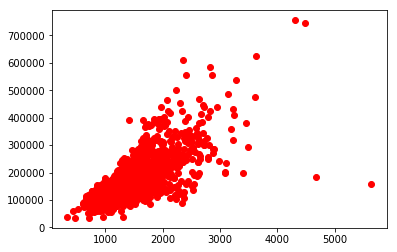

In [2]:
#распределение площади домов и цен
plt.plot(df['GrLivArea'], df['SalePrice'], 'ro')

In [3]:
#очистка списка
def cleaning(df):
    categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
    numerical_columns   = [c for c in df.columns if (df[c].dtype.name != 'object' and c != 'SalePrice')]
    answer_column = [c for c in df.columns if c == 'SalePrice']
    #заполняем пустые количественные медианным значением
    df = df.fillna(df.median(axis=0), axis=0) 
    #заполняем пустые категориальные самым частым значением по признаку
    df_describe = df.describe(include=[object]) #получение сводной информации по таблице
    for c in categorical_columns:                   
        df[c] = df[c].fillna(df_describe[c]['top']) # fillna() - метод для замены отсутствующих значений на числовые
    #перевод категориальных фич в числовые
    binary_columns    = [c for c in categorical_columns if df_describe[c]['unique'] == 2] #бинарные
    nonbinary_columns = [c for c in categorical_columns if df_describe[c]['unique'] > 2] #небинарные
    for c in binary_columns:
        top = df_describe[c]['top']
        top_items = df[c] == top
        df.loc[top_items, c] = 0
        df.loc[np.logical_not(top_items), c] = 1
    df_nonbinary = pd.get_dummies(df[nonbinary_columns]) #возврат нового столбца для каждого элемента
    #нормализация количественных признаков
    df_numerical = df[numerical_columns]
    df_numerical = (df_numerical - df_numerical.mean()) / df_numerical.std()
    df_answer = df[answer_column] #не требуется нормализация
    #соединяем всё в таблицу
    df = pd.concat((df_numerical, df[binary_columns], df_nonbinary, df_answer), axis=1)
    df = pd.DataFrame(df, dtype=float)
    return df
df = cleaning(df)
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.165692,-0.025899,-0.128187,-0.043861,-0.011783,-0.013748,-0.009535,-0.081539,0.162205,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912,0.386420


In [4]:
df.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
ExterQual_TA            0.589044
FullBath                0.560664
BsmtQual_Ex             0.553105
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
KitchenQual_TA          0.519298
GarageFinish_Unf        0.513906
YearRemodAdd            0.507101
KitchenQual_Ex          0.504094
BsmtQual_TA             0.498545
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.466754
ExterQual_Gd            0.452466
ExterQual_Ex            0.451164
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
GarageFinish_Fin        0.419678
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
MasVnrType_None         0.367456
SaleType_New            0.357509
          

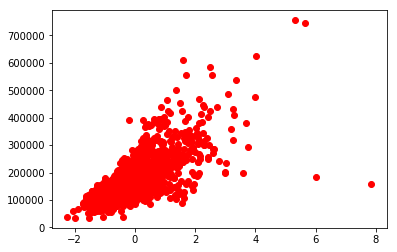

In [5]:
df = df[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','ExterQual_TA','FullBath','BsmtQual_Ex','TotRmsAbvGrd','YearBuilt','KitchenQual_TA','GarageFinish_Unf','KitchenQual_Ex','SalePrice']]
plt.plot(df['GrLivArea'], df['SalePrice'], 'ro')


In [6]:
# Разделить данные
x = df.drop(('SalePrice'), axis=1)  # входные фичи
y = df['SalePrice']                 # ответ

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 11)
#Обучить модель из sklearn, реализовать линейную регрессию
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x_train, y_train)
y_valid_predict = regr.predict(x_valid)
print('Коэффициенты: \n', regr.coef_)
print("MAE(средний модуль ошибки): %.2f" % mean_absolute_error(y_valid, y_valid_predict))
print('Оценка дисперсии: %.2f' % r2_score(y_valid, y_valid_predict))

Коэффициенты: 
 [20040.67868727 21282.06721516 10568.03838394  8025.47815134
 -5591.26260915 -1630.22122407 33991.18852775  2996.11055473
  6258.80121185 -9984.24646655 -7607.93499391 29703.13546797]
MAE(средний модуль ошибки): 21247.26
Оценка дисперсии: 0.83


In [8]:
#прогон модели по тестовой выборке
x_test = pd.read_csv('C:/Anaconda/test.csv')
y_test = pd.read_csv('C:/Anaconda/sample_submission.csv')
x_test = cleaning(x_test)
x_test = x_test[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','ExterQual_TA','FullBath','BsmtQual_Ex','TotRmsAbvGrd','YearBuilt','KitchenQual_TA','GarageFinish_Unf','KitchenQual_Ex']]
y_test = y_test[['SalePrice']]
#предсказание
y_test_predict = regr.predict(x_test)
print('Коэффициенты: \n', regr.coef_)
print("MAE: %.2f" % mean_absolute_error(y_test, y_test_predict))
print('Оценка дисперсии: %.2f' % r2_score(y_test, y_test_predict))

Коэффициенты: 
 [20040.67868727 21282.06721516 10568.03838394  8025.47815134
 -5591.26260915 -1630.22122407 33991.18852775  2996.11055473
  6258.80121185 -9984.24646655 -7607.93499391 29703.13546797]
MAE: 52785.16
Оценка дисперсии: -15.53
